# Notebook to evaluate the CellPainting protocol 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import string
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm, Normalize
from matplotlib.colors import to_hex

In [4]:
df_level4b = pd.read_csv("../02_processed_data/df_level4b.csv")

In [5]:
# Ensure 'Metadata_Well' is a string
df_level4b["Metadata_Well"] = df_level4b["Metadata_Well"].astype(str)

# Extract row (letter(s)) and column (numbers))
df_level4b["Metadata_row"] = df_level4b["Metadata_Well"].str.extract(r"^([A-Z]+)")
df_level4b["Metadata_col"] = df_level4b["Metadata_Well"].str.extract(r"(\d+)$").astype(int)

# Convert row letters (A→1, B→2, etc.)
row_map = {letter: idx for idx, letter in enumerate(string.ascii_uppercase, start=1)}
df_level4b["Metadata_row"] = df_level4b["Metadata_row"].map(row_map)
# Compute a column with unique id column
df_level4b["Metadata_Source_Plate_Well"] = (
        df_level4b["Metadata_Source"].astype(str) + "_" +
        df_level4b["Metadata_Plate"].astype(str) + "_" +
        df_level4b["Metadata_Well"].astype(str)
    )

# Evaluate replicats

In [6]:
# Replicates per plates 
plates = df_level4b["Metadata_Plate"].unique()
for _plate in plates:
    n_chem_rep_plate = sum(df_level4b[df_level4b["Metadata_Plate"] == _plate][["Metadata_JCP2022"]].value_counts().to_frame()['count'] > 1)
    n_chem_no_rep_plate = sum(df_level4b[df_level4b["Metadata_Plate"] == _plate][["Metadata_JCP2022"]].value_counts().to_frame()['count'] == 1)
    print("In plate ", _plate,", there are :", n_chem_rep_plate, "chemicals that have replicates")
    print("In plate ", _plate,", there are :", n_chem_no_rep_plate, "chemicals that don't have replicates")

In plate  BR00127145 , there are : 20 chemicals that have replicates
In plate  BR00127145 , there are : 282 chemicals that don't have replicates
In plate  BR00127146 , there are : 20 chemicals that have replicates
In plate  BR00127146 , there are : 282 chemicals that don't have replicates
In plate  BR00127147 , there are : 19 chemicals that have replicates
In plate  BR00127147 , there are : 282 chemicals that don't have replicates
In plate  BR00127148 , there are : 20 chemicals that have replicates
In plate  BR00127148 , there are : 282 chemicals that don't have replicates
In plate  BR00127149 , there are : 20 chemicals that have replicates
In plate  BR00127149 , there are : 282 chemicals that don't have replicates


In [7]:
# Replicates per plate per chemical
plates = df_level4b["Metadata_Plate"].unique()
chemicals = df_level4b["Metadata_JCP2022"].unique()
for _plate in plates:
    for _chemical in chemicals:
        n_chem_rep = df_level4b[
            (df_level4b["Metadata_Plate"] == _plate) &
            (df_level4b["Metadata_JCP2022"] == _chemical)
        ]
        print(f"Plate: {_plate}, Chemical: {_chemical}, Replicates: {len(n_chem_rep)}")

Plate: BR00127145, Chemical: JCP2022_043547, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_050797, Replicates: 2
Plate: BR00127145, Chemical: JCP2022_050997, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_108326, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_033924, Replicates: 64
Plate: BR00127145, Chemical: JCP2022_027911, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_100264, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_050861, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_014367, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_071429, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_016288, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_091373, Replicates: 2
Plate: BR00127145, Chemical: JCP2022_004940, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_103217, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_079562, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_020163, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_099471, Replicates

In [8]:
for _plate in plates:
    n_dmso = sum(df_level4b[df_level4b["Metadata_Plate"] == _plate]["Metadata_Name"] == "DMSO")
    print("In plate ", _plate,", there are :", n_dmso, "DMSO out of 384 wells")

In plate  BR00127145 , there are : 64 DMSO out of 384 wells
In plate  BR00127146 , there are : 64 DMSO out of 384 wells
In plate  BR00127147 , there are : 64 DMSO out of 384 wells
In plate  BR00127148 , there are : 64 DMSO out of 384 wells
In plate  BR00127149 , there are : 64 DMSO out of 384 wells


In [9]:
chemicals = df_level4b["Metadata_JCP2022"].unique()
for _chemical in chemicals:
    n_chem = len(df_level4b[df_level4b["Metadata_JCP2022"] == _chemical])
    print("For chemical ", _chemical,", there are :", n_chem, "replicates accross the different plates")

For chemical  JCP2022_043547 , there are : 5 replicates accross the different plates
For chemical  JCP2022_050797 , there are : 10 replicates accross the different plates
For chemical  JCP2022_050997 , there are : 5 replicates accross the different plates
For chemical  JCP2022_108326 , there are : 5 replicates accross the different plates
For chemical  JCP2022_033924 , there are : 320 replicates accross the different plates
For chemical  JCP2022_027911 , there are : 5 replicates accross the different plates
For chemical  JCP2022_100264 , there are : 5 replicates accross the different plates
For chemical  JCP2022_050861 , there are : 5 replicates accross the different plates
For chemical  JCP2022_014367 , there are : 5 replicates accross the different plates
For chemical  JCP2022_071429 , there are : 5 replicates accross the different plates
For chemical  JCP2022_016288 , there are : 5 replicates accross the different plates
For chemical  JCP2022_091373 , there are : 10 replicates accro

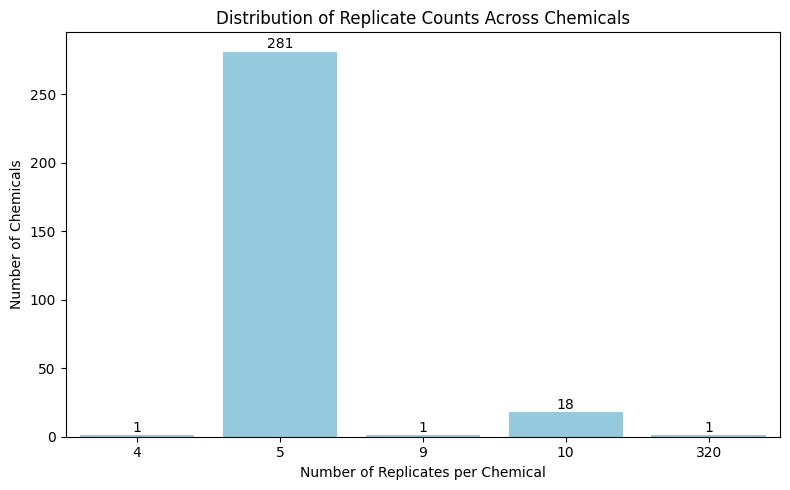

In [10]:
# Count replicates per chemical
replicates = (
    df_level4b.groupby("Metadata_JCP2022")
    .size()
    .reset_index(name="Replicates")
)

# Count how many chemicals have each replicate count
replicate_dist = replicates["Replicates"].value_counts().sort_index()

# --- Plot ---
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=replicate_dist.index,
    y=replicate_dist.values,
    color="skyblue"
)

# Add numbers on top of bars
for i, v in enumerate(replicate_dist.values):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)

plt.title("Distribution of Replicate Counts Across Chemicals")
plt.xlabel("Number of Replicates per Chemical")
plt.ylabel("Number of Chemicals")
plt.tight_layout()
plt.show()


# Analysis experiments

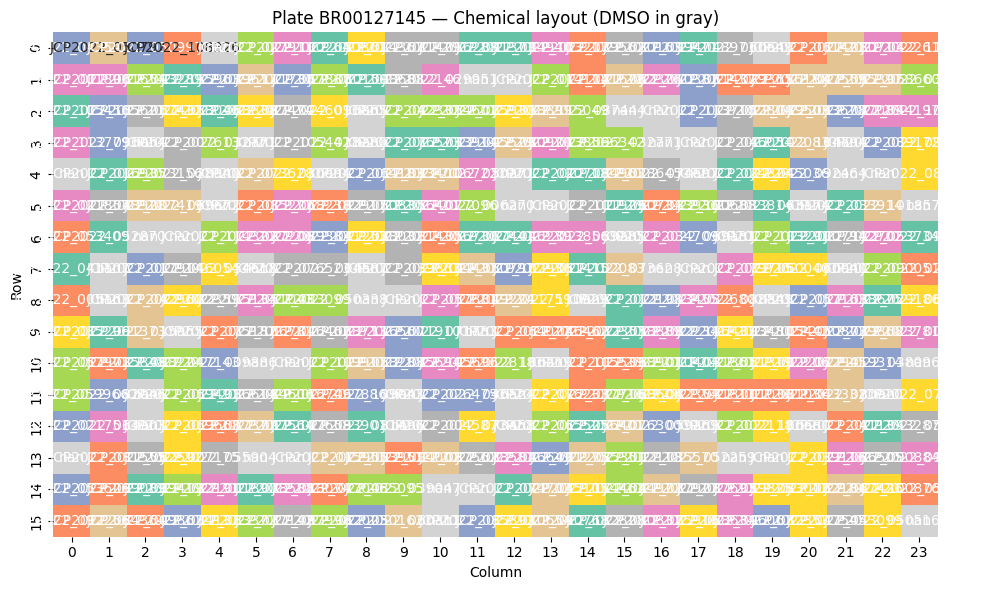

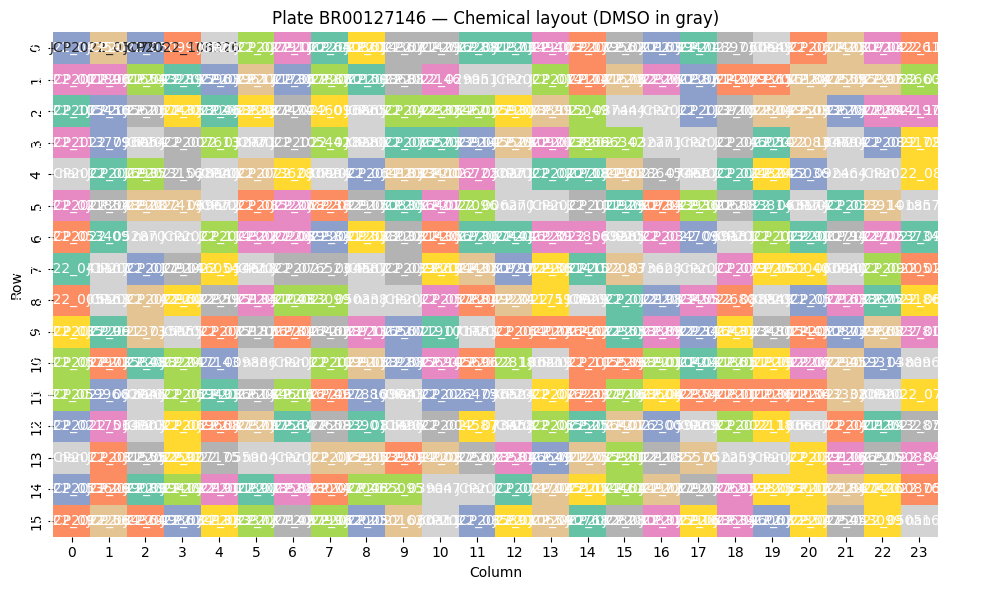

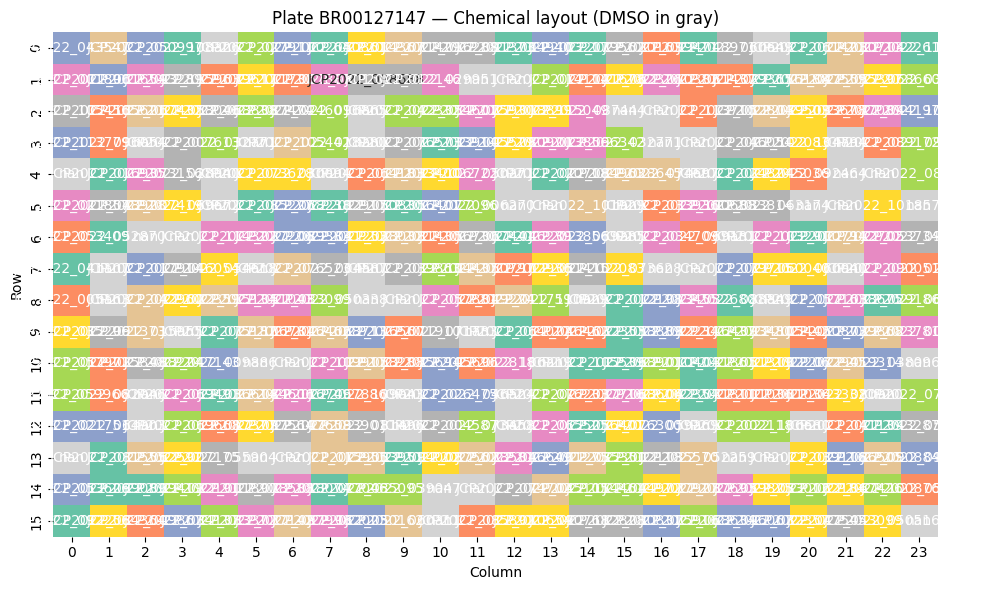

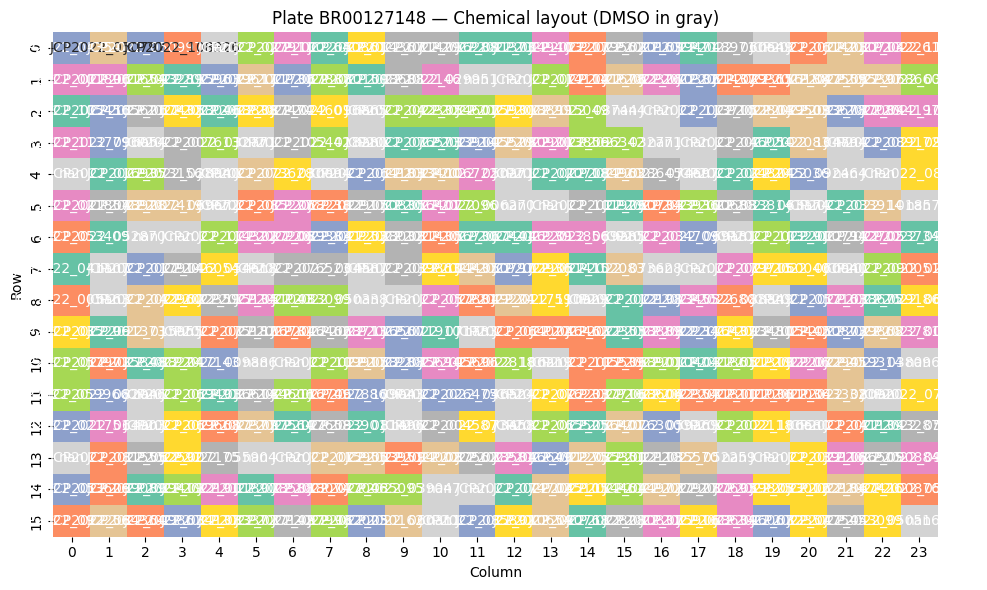

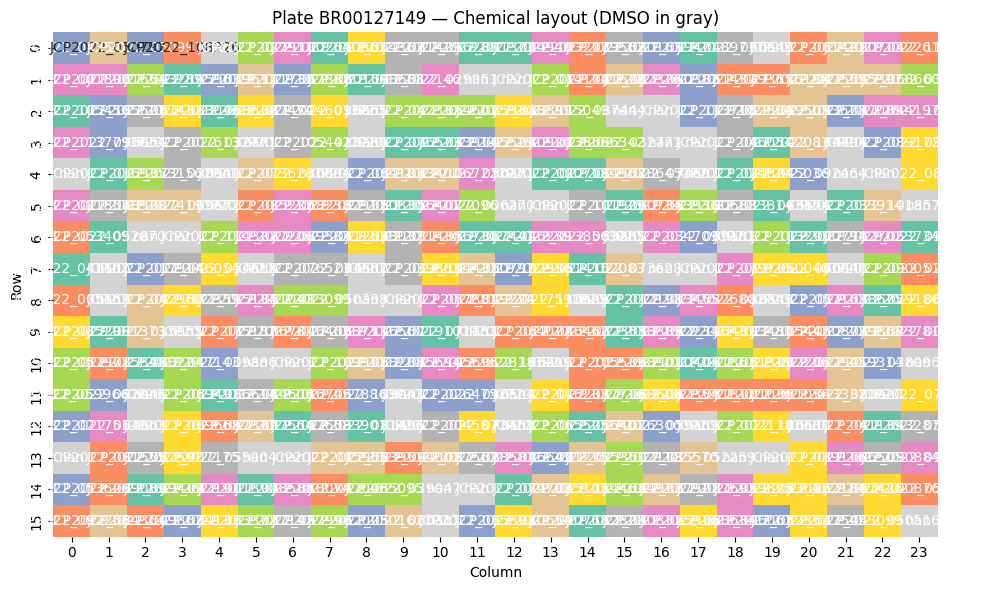

In [11]:
for _plate, df_plate in df_level4b.groupby("Metadata_Plate"):
    df_plate = df_plate.copy()
    df_plate["is_DMSO"] = df_plate["Metadata_Name"].eq("DMSO")

    # Create column for plotting: chemical name or NaN for DMSO
    df_plate["chem_for_plot"] = np.where(
        df_plate["is_DMSO"], np.nan, df_plate["Metadata_JCP2022"]
    )

    # Unique non-DMSO chemicals
    unique_chems = sorted(df_plate.loc[~df_plate["is_DMSO"], "Metadata_JCP2022"].unique())
    n_chems = len(unique_chems)

    # Pivot for plate layout
    plate_map = (
        df_plate.pivot(index="Metadata_row", columns="Metadata_col", values="chem_for_plot")
        .sort_index()
        .sort_index(axis=1)
    )

    # --- Colormap setup ---
    _cmap = ListedColormap(sns.color_palette("Set2", n_colors=n_chems))

    plt.figure(figsize=(10, 6))

    # --- Draw base map: color by chemical ---
    _color_dict = dict(zip(unique_chems, _cmap.colors))
    _color_dict = {chem: to_hex(color) for chem, color in _color_dict.items()}
    color_grid = plate_map.replace(_color_dict)

    # Replace NaN (DMSO) with gray color
    color_grid = color_grid.fillna("lightgray")

    # --- Plot ---
    _ax = sns.heatmap(
        np.empty_like(color_grid, dtype=float),  # placeholder grid
        annot=plate_map,                        # show chemical names (optional)
        fmt="",
        cbar=False,
        linewidths=0.5,
        linecolor="gray",
    )

    for (r, c), value in np.ndenumerate(plate_map.values):
        color = "lightgray" if pd.isna(value) else _color_dict[value]
        _ax.add_patch(plt.Rectangle((c, r), 1, 1, fill=True, color=color, lw=0))

    # --- Custom legend ---
    #legend_elements = [
    #    Patch(facecolor=color, label=chem) for chem, color in _color_dict.items()
    #]
    #legend_elements.append(Patch(facecolor="lightgray", label="DMSO"))

    #plt.legend(
    #    handles=legend_elements,
    #    title="Chemicals",
    #    bbox_to_anchor=(1.05, 1),
    #    loc="upper left",
    #    borderaxespad=0.,
    #)


    # --- Aesthetic details ---
    plt.title(f"Plate {_plate} — Chemical layout (DMSO in gray)")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.tight_layout()
    plt.show()


# Analysis GRiT

In [12]:
df_grit = pd.read_csv("../02_processed_data/grit.csv")

In [13]:
# Join table metadata
df_grit_annotate = pd.merge(
    df_grit,
    df_level4b,
    left_on=["perturbation"],
    right_on=["Metadata_Source_Plate_Well"],
    how="inner"   # or "left" / "right" / "outer" depending on your need
)

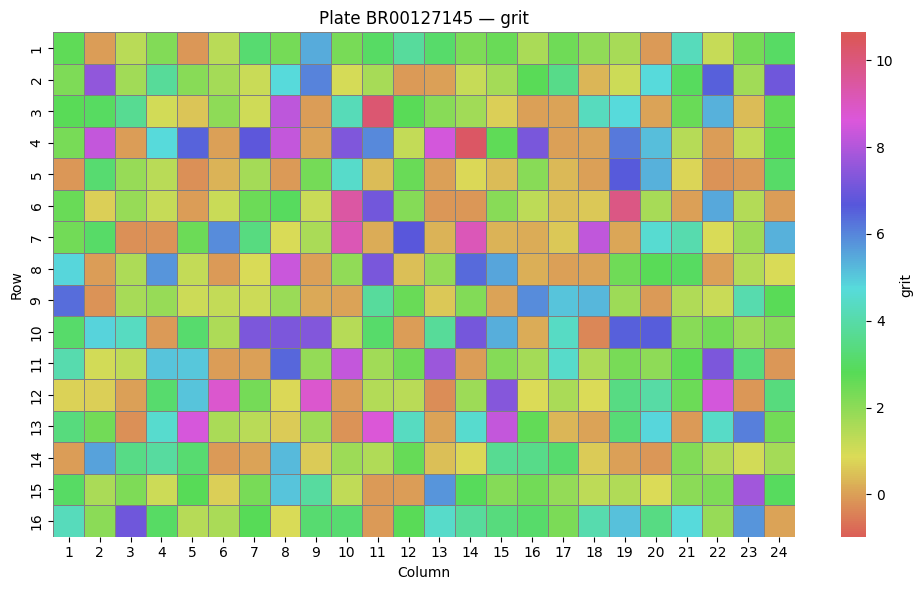

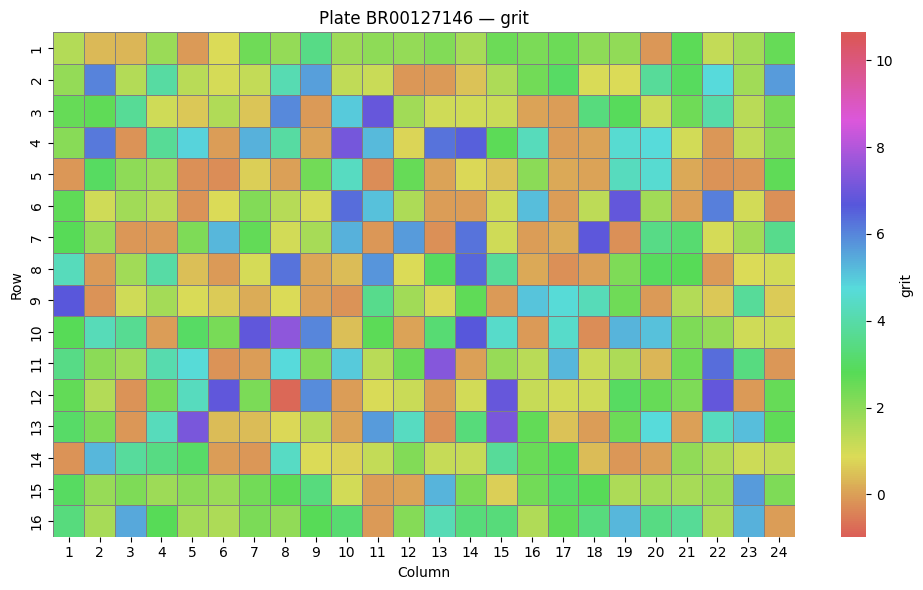

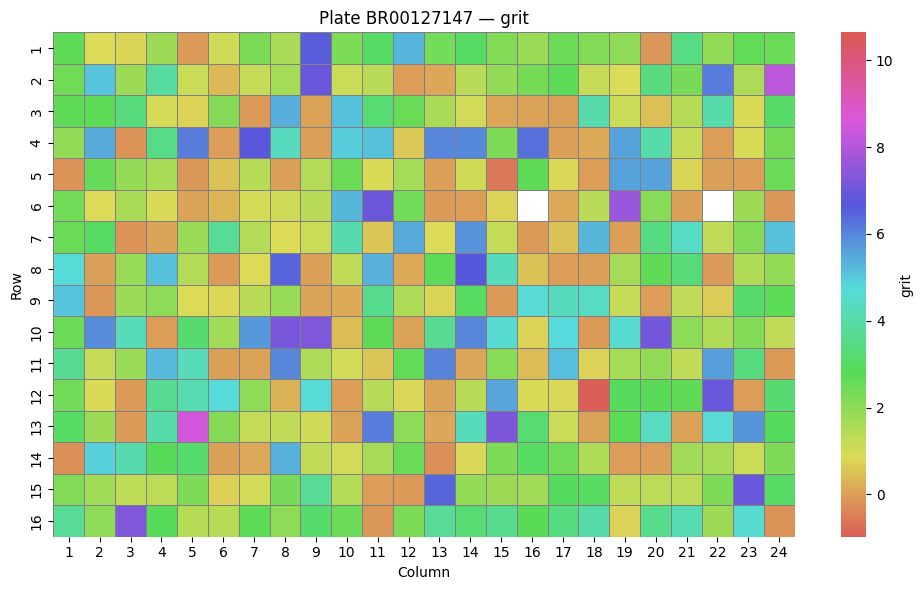

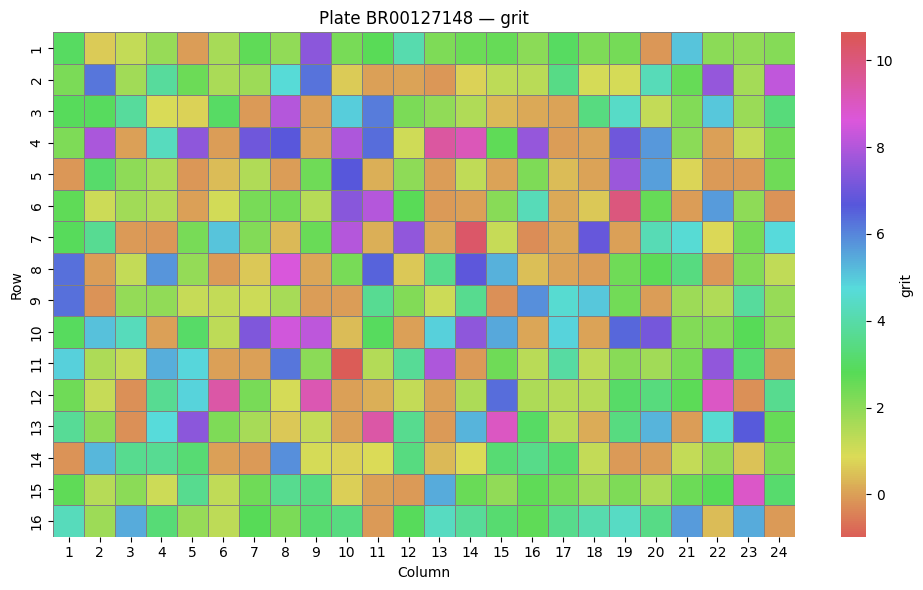

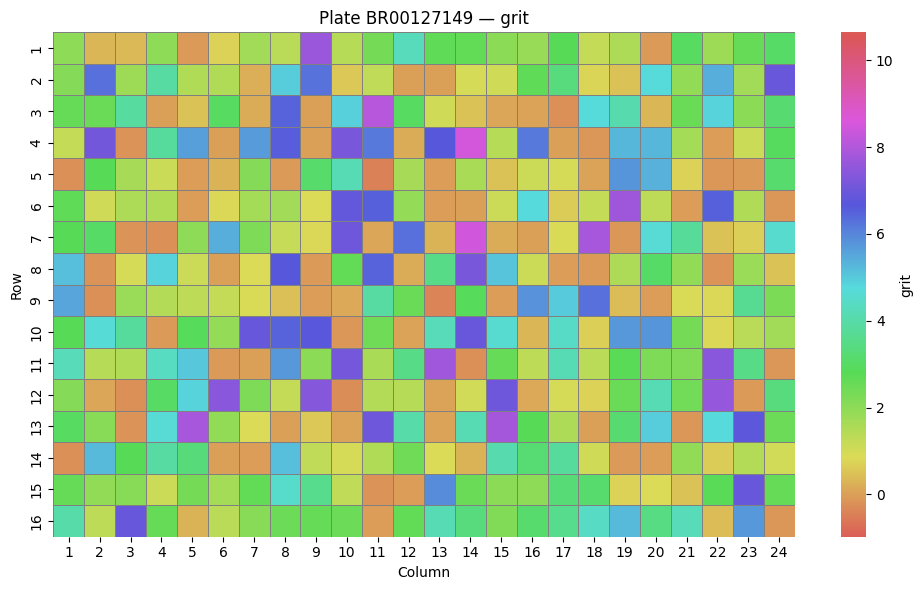

In [14]:
# Create a common color map
_cmap = sns.color_palette("hls", as_cmap=True)
# Compute global min and max across all data
_vmin = df_grit_annotate["grit"].min()
_vmax = df_grit_annotate["grit"].max()
for _plate, df_plate_grit in df_grit_annotate.groupby("Metadata_Plate"):
    df_plate_grit = df_plate_grit.copy()
    df_plate_grit["grit_for_plot"] = df_plate_grit["grit"]

    # Pivot for heatmap
    plate_map_ldh = (
        df_plate_grit.pivot(
            index="Metadata_row",
            columns="Metadata_col",
            values="grit_for_plot",
        )
        .sort_index()
        .sort_index(axis=1)
    )

    plt.figure(figsize=(10, 6))

    _ax = sns.heatmap(
        plate_map_ldh,
        cmap=_cmap,
        vmin=_vmin,
        vmax=_vmax,
        cbar_kws={"label": "grit"},
        linewidths=0.5,
        linecolor="gray",
    )

    # --- Aesthetic details ---
    plt.title(f"Plate {_plate} — grit")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.tight_layout()
    plt.show()

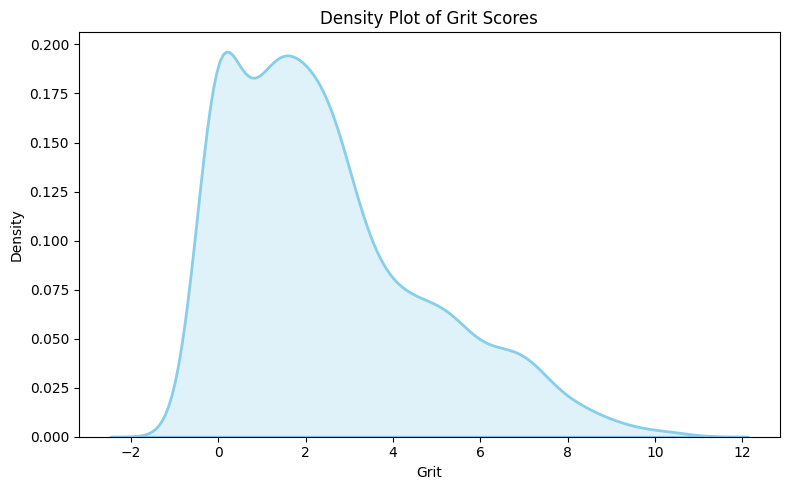

In [15]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=df_grit_annotate,
    x="grit",
    fill=True,
    color="skyblue",
    linewidth=2
)

plt.title("Density Plot of Grit Scores")
plt.xlabel("Grit")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


# Analysis mAP: phenotypic activity assessment

In [27]:
df_map = pd.read_csv("../02_processed_data/mean_average_precision.csv")
df_map["-log10(p-value)"] = -df_map["corrected_p_value"].apply(np.log10)

In [28]:
df_map

,Metadata_JCP2022,Metadata_reference_index,mean_average_precision,indices,p_value,corrected_p_value,below_p,below_corrected_p,-log10(p-value)
0,JCP2022_000794,-1,0.876603,"[135, 455, 773, 1093, 1413]",9.999990e-07,0.000003,True,True,5.589620
1,JCP2022_001036,-1,0.901322,"[233, 234, 553, 554, 871, 872, 1191, 1192, 151...",9.999990e-07,0.000003,True,True,5.589620
2,JCP2022_001275,-1,0.063888,"[267, 587, 905, 1225, 1545]",7.010893e-02,0.076737,False,False,1.114993
3,JCP2022_001890,-1,0.679477,"[22, 280, 342, 600, 662, 918, 980, 1238, 1300,...",9.999990e-07,0.000003,True,True,5.589620
4,JCP2022_002118,-1,0.922674,"[252, 269, 572, 589, 890, 907, 1210, 1227, 153...",9.999990e-07,0.000003,True,True,5.589620
...,...,...,...,...,...,...,...,...,...
296,JCP2022_115963,-1,1.000000,"[25, 345, 665, 983, 1303]",9.999990e-07,0.000003,True,True,5.589620
297,JCP2022_116188,-1,0.950000,"[39, 359, 679, 997, 1317]",9.999990e-07,0.000003,True,True,5.589620
298,JCP2022_116437,-1,0.018756,"[191, 511, 829, 1149, 1469]",4.670575e-01,0.467058,False,False,0.330630
299,JCP2022_116560,-1,1.000000,"[183, 503, 821, 1141, 1461]",9.999990e-07,0.000003,True,True,5.589620


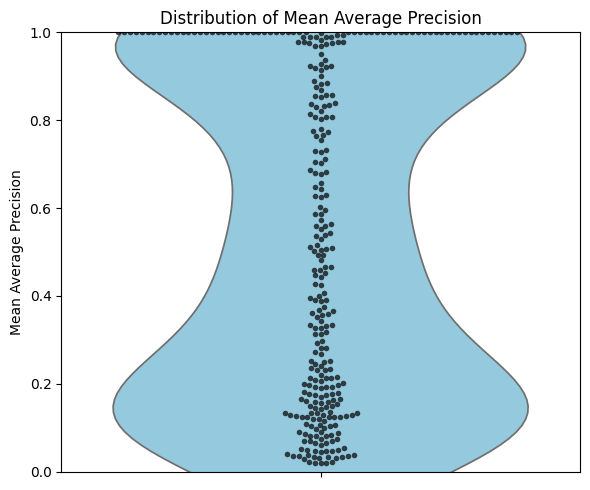

In [29]:
plt.figure(figsize=(6, 5))

sns.violinplot(
    data=df_map,
    y="mean_average_precision",
    inner=None,
    color="skyblue"
)

sns.swarmplot(
    data=df_map,
    y="mean_average_precision",
    color="black",
    size=4,
    alpha=0.7
)

plt.title("Distribution of Mean Average Precision")
plt.ylabel("Mean Average Precision")
plt.xlabel("")
plt.ylim(0, 1)   # <-- limits between 0 and 1
plt.tight_layout()
plt.show()



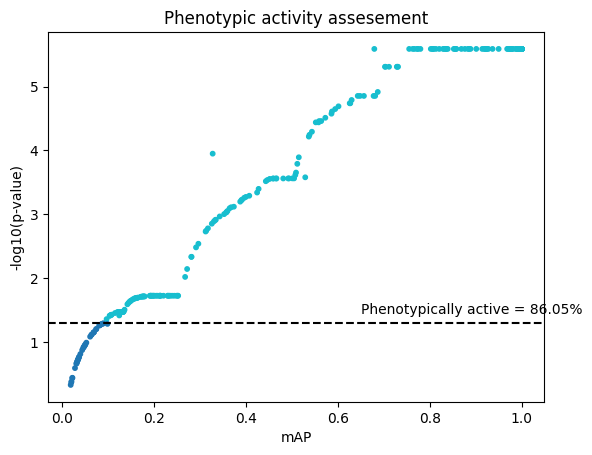

In [30]:
active_ratio = df_map.below_corrected_p.mean()

plt.scatter(
    data=df_map,
    x="mean_average_precision",
    y="-log10(p-value)",
    c="below_corrected_p",
    cmap="tab10",
    s=10,
)
plt.title("Phenotypic activity assesement")
plt.xlabel("mAP")
plt.ylabel("-log10(p-value)")
plt.axhline(-np.log10(0.05), color="black", linestyle="--")
plt.text(
    0.65,
    1.5,
    f"Phenotypically active = {100 * active_ratio:.2f}%",
    va="center",
    ha="left",
)
plt.show()

In [33]:
print("Out of", len(df_map),"chemicals, there are", sum(df_map["below_corrected_p"]),"with distinguishable phenotypes compaerd to control")

Out of 301 chemicals, there are 259 with distinguishable phenotypes compaerd to control
